# Histograms and densities of states
In this notebook we will explore some of the ideas behind a density of states function, In particular, we will examine the notion of a probability distribution function (pdf) as the limit of a histogram with vanishingly small bin width.

First import some useful functionality

In [106]:
from __future__ import division
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

Now let's define a model density of states function:

In [107]:
bwidth = 10.0
def f1(x):
    return 1.0/(exp((0.2*bwidth-x)/(0.025*bwidth))+1.0)
def f2(x):
    return -1.0/(exp((1.2*bwidth-x)/(0.025*bwidth))+1.0)
def f3(x):
    return 10.0/(exp((0.8*bwidth-x)/(0.025*bwidth))+1.0)
def f4(x):
    return -10.0/(exp((0.85*bwidth-x)/(0.025*bwidth))+1.0)

def g(x):
    return (f1(x)+f2(x)+f3(x)+f4(x))/14.97

# npts = 500
# Elin = linspace(0,14,npts)
# print(np.sum(g(Elin))*14/npts)


And plot it:

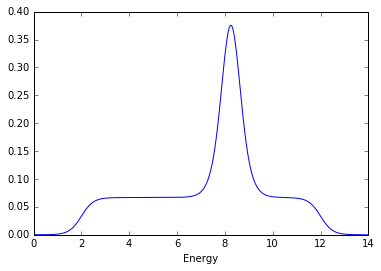

In [108]:
npts = 500
Elin = linspace(0,14,npts)
plt.xlabel('Energy')
plt.ylabel('')
plt.plot(Elin,g(Elin))

This is just a model function but it is not too crazy. It might plausibly represent the density of states of a transition metal with a broad sp-band and a sharp d-band. Note that this density of states function is a pdf for the energy of the states of the system. It is therefore normalised such that the total area under the curve is 1.

### Sampling a distribution
Imagine we draw $n$ samples from the above distribution. The code below implements this sampling. Note that I am using a very simple sampling algorithm:
- First I pick an energy $E_{\mathrm{sample}}$ at random from somewhere in the range of the function (i.e. in the bandwidth)
- Then I pick a random number number between 0 and 1
- If this number is less than the value of $g(E_{\mathrm{sample}})$ then I record $E_{\mathrm{sample}}$ in my list of sampled energies. Otherwise I reject it and start again.
- I carry on until I have successfully recorded my required number of sampel energies.

There are more efficient ways than this to sample a general function, but this approach is fast enough for our purposes. The code outputs information about how many attempts I had to make in order to acheive the required number of samples.

In [109]:
n = 100000 # Number of samples to collect
Evals = np.zeros(n, dtype=float) # Array to hold smapled values

maxe = 14.0 # Maximum energy covered by g(E)
maxg = np.max(g(Elin)) # Find max value of g(E)

i = 0 # Counter for recorded samples
s = 0 # Counter for number of attempts to sample
while i < n:
    s = s + 1
    E = maxe*random()
    if maxg*random() < g(E):
        Evals[i] = E
        i = i + 1        

print('Needed to draw: ' + str(s) + ' random numbers to obtain ' + str(n) + ' samples => ' + str(int(100*n/s)) + '% efficient')

Needed to draw: 524293 random numbers to obtain 100000 samples => 19% efficient


I've drawn a very large number of samples because we will need them below.

### Plotting a bar chart
The simplest way to show these data is in a bar chart. For each range of energy we simple count the number of samples in each "bin":

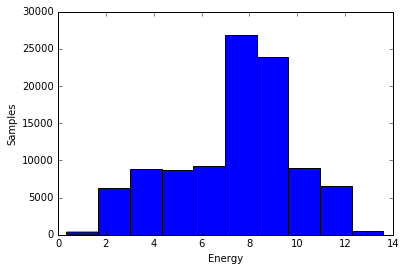

In [110]:
nbins = 10
plt.xlabel('Energy')
plt.ylabel('Samples')
plt.hist(Evals, bins=nbins);

This is a reasonable graphical representation of the data, and we can see the form of our density of states function in there, but the plot is dependent on the number of bins used:

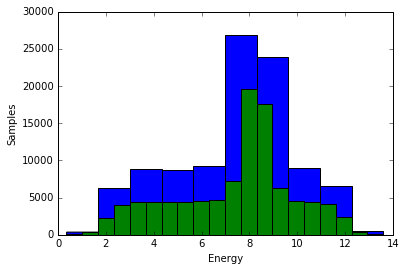

In [111]:
nbins = 10
plt.xlabel('Energy')
plt.ylabel('Samples')
plt.hist(Evals, bins=nbins);

nbins = 20
plt.hist(Evals, bins=nbins);

### Plotting a histogram
This dependence of the appearance of the chart on the somewhat arbitrary choice of the number of bins is annoying. Instead of a bar chart we could plot a histogram. With a histogram, the height of each bar is normalised by its width such that the *area* of each bar is constant as its width is varied. The total area of all the bars is also the same, irrespective of how the data are binned. Python will mke this normalisation for you if you give the option `normed=1`. Here's an example:

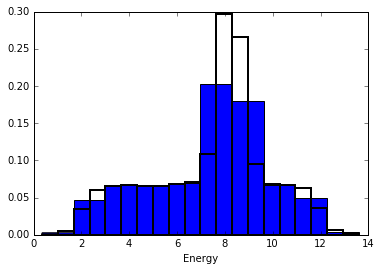

In [112]:
nbins = 10
plt.xlabel('Energy')
plt.hist(Evals, nbins, normed=1);

nbins =20
plt.hist(Evals, nbins, normed=1, facecolor='none', linewidth=2);

I've drawn on histogram on top of the other so that you can see that the shape of the plot no longer depends on the choice of binning. The total area of all the bars is now equal to 1 for all binning choices.

### The limit of many bins
The reason that we originally drew so many samples from $g(E)$ will now bcome apparent. A pdf (which is what $g(E)$ is) can be thought of as a limit of a histogram in which the bin width is allowed to tend to zero (i.e. with an infinite number of bins. We can't manage an infinite number of bins but we can choose a pretty large number. Below we compare a histogram (in blue) with very many bins to the original function $g(E)$ (in red) which we used as a pdf to draw the sample of energies.

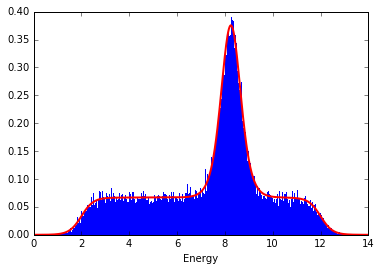

In [113]:
nbins = 1000
plt.xlabel('Energy')
plt.hist(Evals, nbins, normed=1, linewidth=0)
plt.plot(Elin,g(Elin), 'r', linewidth=2)
